In [11]:
import os
import numpy as np
import xarray as xr
import geopandas as gpd

import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

In [12]:
# product = 'ERA5'
product = 'CMORPH'

In [13]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy')

In [14]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [15]:
DATA = xr.open_dataset(os.path.join(dir_base,'Satellite','5_DOWN',f'Italy-SHP_DOWN_{product}_3h_2002_2023_npix_2_thr_1_acf_mar_genetic_spearman.nc'))

lon2d, lat2d = np.meshgrid(DATA.lon, DATA.lat)

Tr = DATA.Tr.values
BETA = DATA.BETA.values
GAMMA = DATA.GAMMA.values
Mev_s = DATA.Mev_s.values
Mev_d = DATA.Mev_d.values
funval = DATA.FUNVAL.values

DATA

<xarray.Dataset> Size: 3MB
Dimensions:  (year: 22, lat: 48, lon: 52, Tr: 6)
Coordinates:
  * year     (year) int64 176B 2002 2003 2004 2005 2006 ... 2020 2021 2022 2023
  * Tr       (Tr) int64 48B 5 10 20 50 100 200
  * lat      (lat) float32 192B 36.12 36.38 36.62 36.88 ... 47.38 47.62 47.88
  * lon      (lon) float32 208B 6.125 6.375 6.625 6.875 ... 18.38 18.62 18.88
Data variables:
    NYs      (year, lat, lon) float64 439kB ...
    CYs      (year, lat, lon) float64 439kB ...
    WYs      (year, lat, lon) float64 439kB ...
    Mev_s    (Tr, lat, lon) float64 120kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    NYd      (year, lat, lon) float64 439kB ...
    CYd      (year, lat, lon) float64 439kB ...
    WYd      (year, lat, lon) float64 439kB ...
    Mev_d    (Tr, lat, lon) float64 120kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    BETA     (lat, lon) float64 20kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    GAMMA    (lat, lon) float64 20kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    FUNVAL   (lat, lon) float64 20kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    description:  Downscaling for 'CMORPH' in the Italy area, using 'mar' as ...

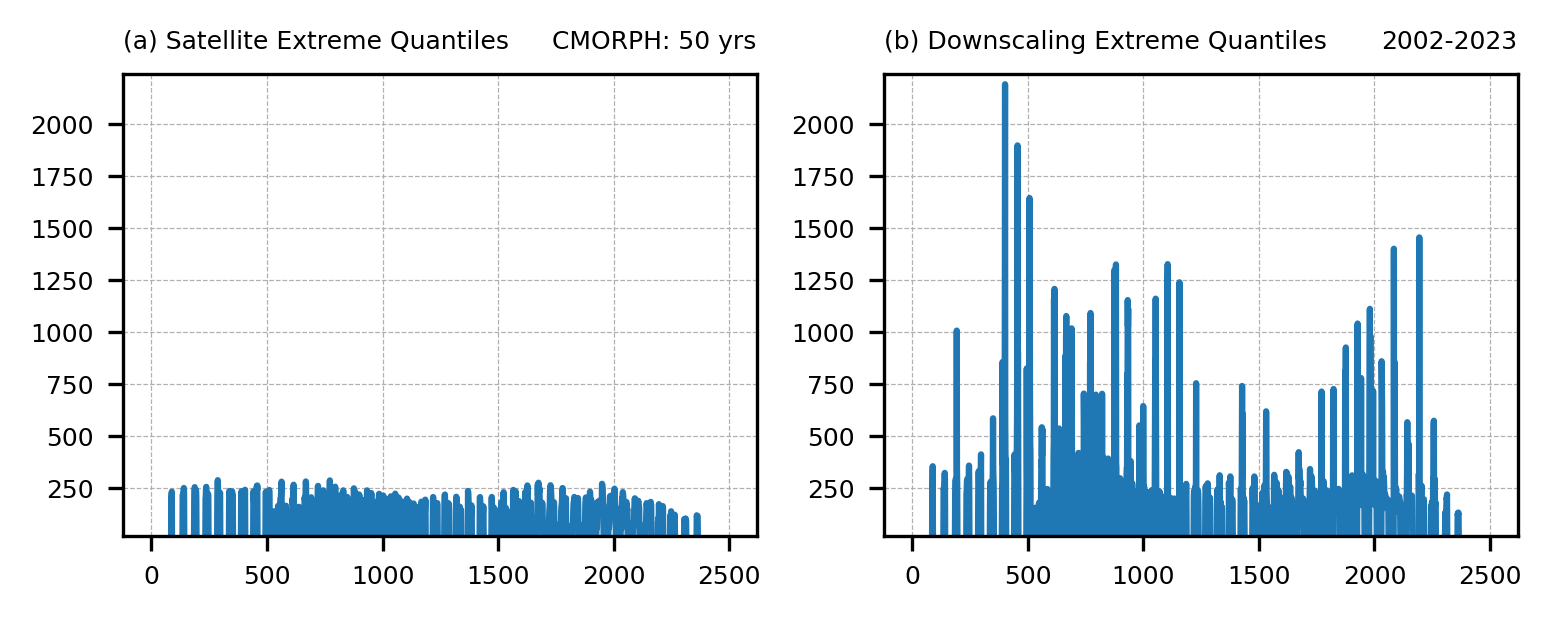

In [7]:
fig = plt.figure(figsize=(6,2),dpi=300)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(Mev_s[3,:,:].flatten())
ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.set_title('(a) Satellite Extreme Quantiles', loc='left', fontsize=6)
ax1.set_title(f'{product}: {Tr[3]} yrs', loc='right', fontsize=6)
ax1.set_ylim(20, np.max([np.nanmax(Mev_s[3,:,:]), np.nanmax(Mev_d[3,:,:])]) + 50)
ax1.grid(linewidth=0.3, linestyle='--')

ax1 = plt.subplot(gs[0, 1])
ax1.plot(Mev_d[3,:,:].flatten())
ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.set_title('(b) Downscaling Extreme Quantiles', loc='left', fontsize=6)
ax1.set_title('2002-2023', loc='right', fontsize=6)
ax1.set_ylim(20, np.max([np.nanmax(Mev_s[3,:,:]), np.nanmax(Mev_d[3,:,:])]) + 50)
ax1.grid(linewidth=0.3, linestyle='--')

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

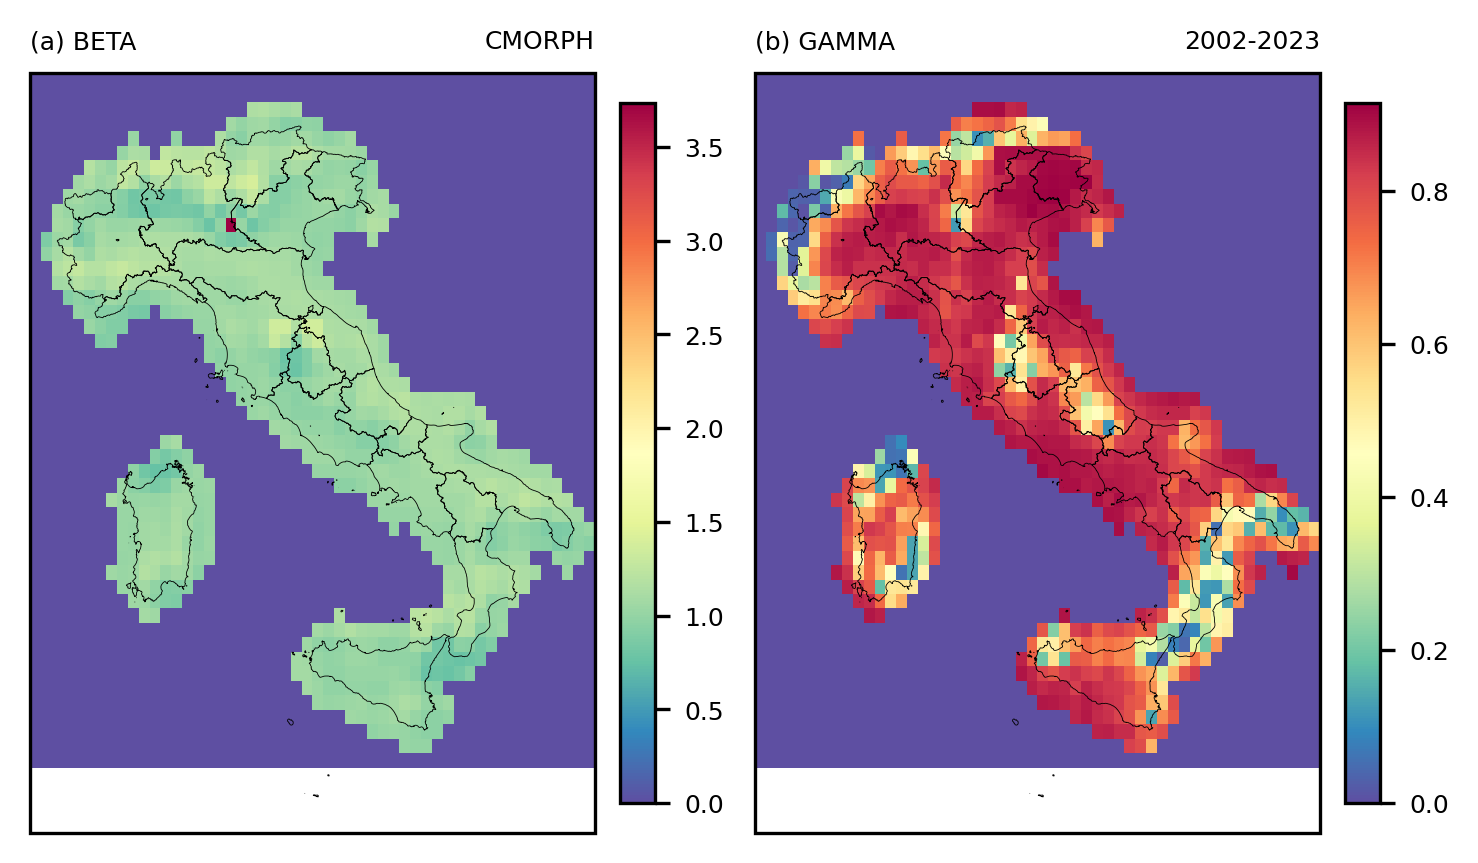

In [8]:
levels_obs = np.arange(50,420,10)
norm = mcolors.BoundaryNorm(boundaries=levels_obs, ncolors=256)
norm = None

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(5,3),dpi=300)
gs = gridspec.GridSpec(1,2)

# ===========================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
REGIONS.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.2)
a1 = ax1.pcolormesh(lon2d, lat2d, BETA, cmap=cmap, norm=norm)
ax1.set_title('(a) BETA', loc='left', fontsize=6)
ax1.set_title(f'{product}', loc='right', fontsize=6)
cbar = plt.colorbar(a1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6)

# ===========================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
REGIONS.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.2)
a1 = ax1.pcolormesh(lon2d, lat2d, GAMMA, cmap=cmap, norm=norm)
ax1.set_title('(b) GAMMA', loc='left', fontsize=6)
ax1.set_title('2002-2023', loc='right', fontsize=6)
cbar = plt.colorbar(a1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6)

# ===========================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.16, hspace=0.1)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

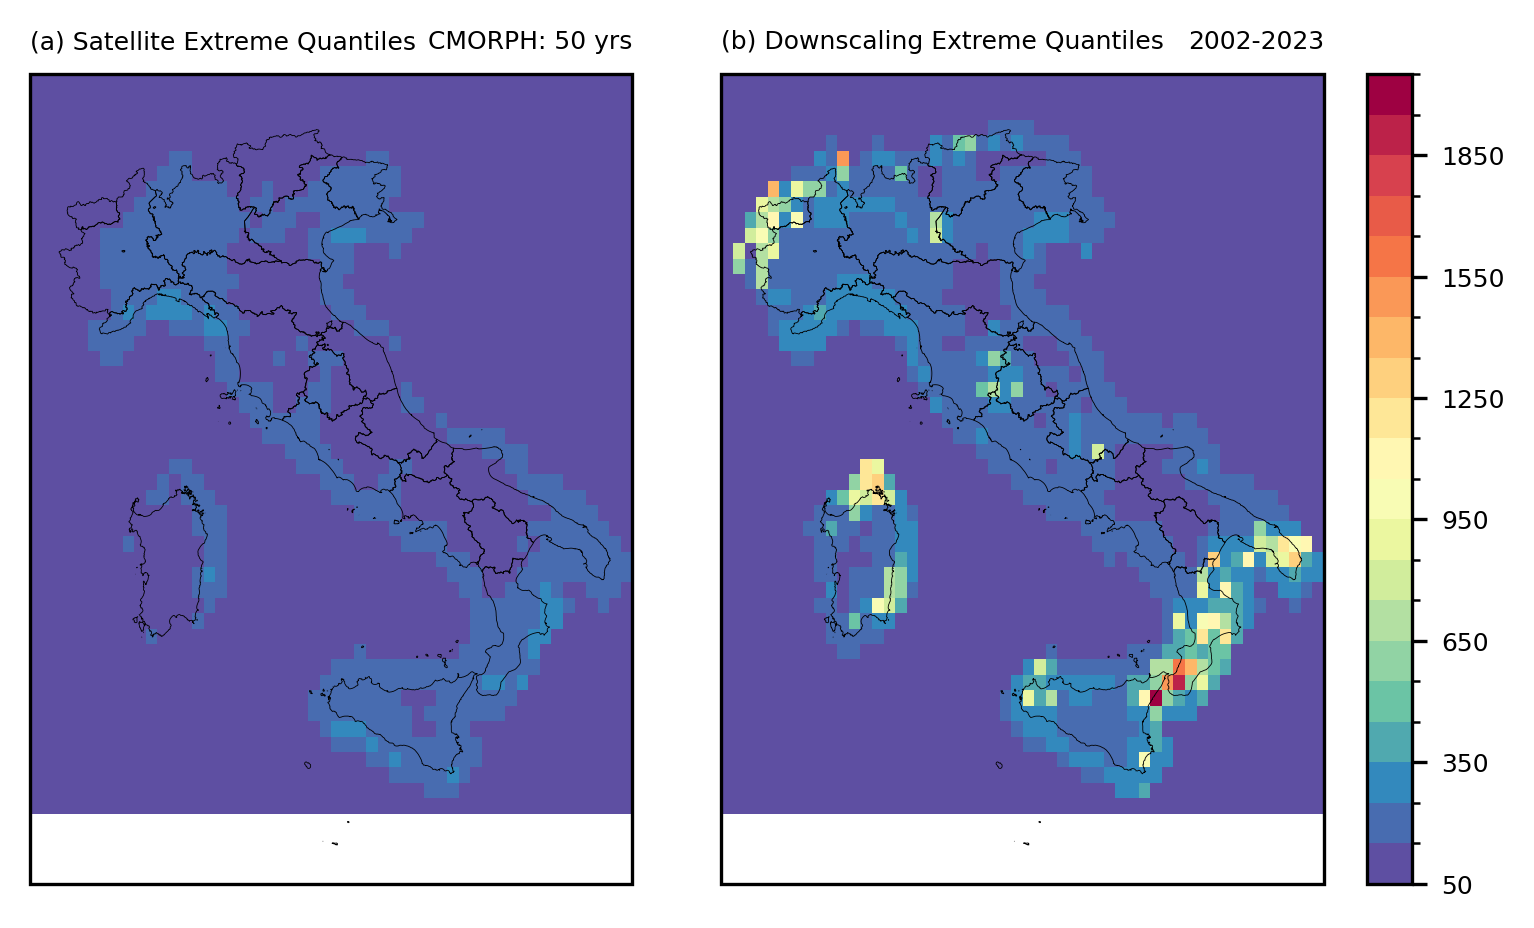

In [9]:
# levels_obs = np.arange(50,420,10)
levels_obs = np.arange(50,2100,100)
norm = mcolors.BoundaryNorm(boundaries=levels_obs, ncolors=256)
# norm = None

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(5,3),dpi=300)
gs = gridspec.GridSpec(1,2)

# ===========================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
REGIONS.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.2)
a1 = ax1.pcolormesh(lon2d, lat2d, Mev_s[3,:,:], cmap=cmap, norm=norm)
ax1.set_title('(a) Satellite Extreme Quantiles', loc='left', fontsize=6)
ax1.set_title(f'{product}: {Tr[3]} yrs', loc='right', fontsize=6)

# ===========================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
REGIONS.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.2)
a1 = ax1.pcolormesh(lon2d, lat2d, Mev_d[3,:,:], cmap=cmap, norm=norm)
ax1.set_title('(b) Downscaling Extreme Quantiles', loc='left', fontsize=6)
ax1.set_title('2002-2023', loc='right', fontsize=6)

# ===========================================================================
cbar_ax = fig.add_axes([0.96, 0.05, 0.03, 0.899])#0.96
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=6)

# ===========================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0.1)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

Text(1.0, 1.0, 'CMORPH')

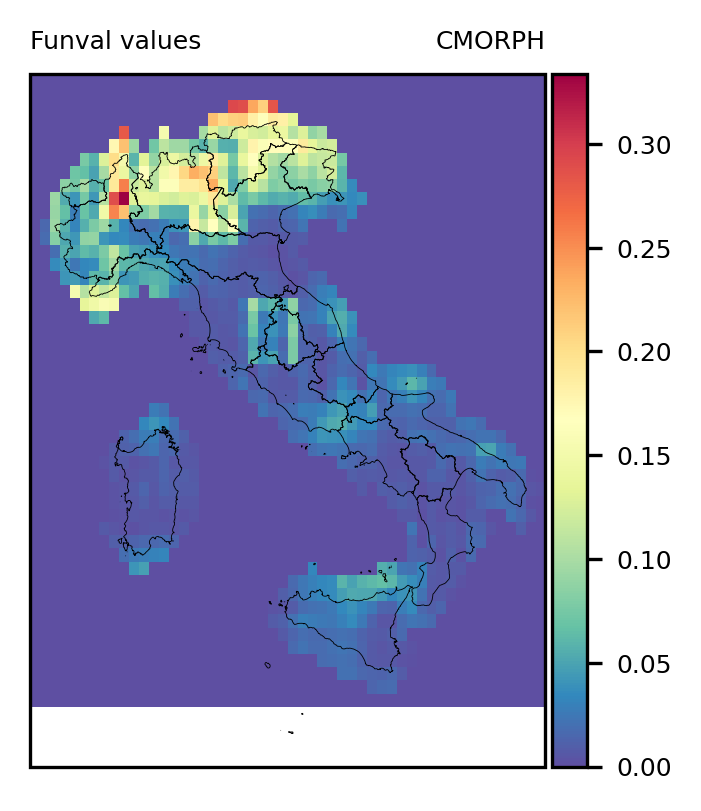

In [10]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(3,3),dpi=300)
gs = gridspec.GridSpec(1,1)

# ===========================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
REGIONS.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.2)
a1 = ax1.pcolormesh(lon2d, lat2d, funval, cmap=cmap)

cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.01,)
cbar.ax.tick_params(labelsize=6)

ax1.set_title('Funval values', loc='left', fontsize=6)
ax1.set_title(f'{product}', loc='right', fontsize=6)